### Twitter Dataset
## 1 Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
result = pd.DataFrame()
desired_columns=['name','username','features','likes_count','retweets_count','replies_count','tweet']
with pd.read_json('twitter_features.json', lines=True, chunksize=20000) as reader:
    reader
    for chunk in reader:
        chunk = chunk[desired_columns]
        result = pd.concat([result, chunk], ignore_index=True)
        print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            20000 non-null  object
 1   username        20000 non-null  object
 2   features        20000 non-null  object
 3   likes_count     20000 non-null  int64 
 4   retweets_count  20000 non-null  int64 
 5   replies_count   20000 non-null  int64 
 6   tweet           20000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40000 non-null  object
 1   username        40000 non-null  object
 2   features        40000 non-null  object
 3   likes_count     40000 non-null  int64 
 4   retweets_count  40000 non-null  int64 
 5   replies_count   4000

In [3]:
result.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...
3,Barack Obama,barackobama,"[-0.1626531, 0.21753979999999998, 0.3880757999...",103,531,83,Watch live JoeBiden lays out the ObamaBiden pl...
4,Barack Obama,barackobama,"[-0.30785029999999997, 0.2269174, 0.2245550999...",66,257,46,Be sure to follow OFADebates during tonights V...


In [4]:
politicians = pd.read_csv('../scraper/politicians.csv')
politicians['twitter_account'] = politicians['twitter_acount'].str.lower()
politicians

,politician_name,twitter_acount,party,twitter_account
0,Barack Obama,BarackObama,democrat,barackobama
1,Bernie Sanders,BernieSanders,democrat,berniesanders
2,Joe Biden,JoeBiden,democrat,joebiden
3,Kamala Harris,VP,democrat,vp
4,Arnold Schwarzenegger,Schwarzenegger,republican,schwarzenegger
5,Hillary Clinton,HillaryClinton,democrat,hillaryclinton
6,Karl Rove,KarlRove,republican,karlrove
7,Elizabeth Warren,ewarren,democrat,ewarren
8,Al Gore,algore,democrat,algore
9,Nancy Pelosi,TeamPelosi,democrat,teampelosi


In [5]:
df = pd.merge(politicians, result, left_on='twitter_account', right_on='username')

In [6]:
df.head(3)

,politician_name,twitter_acount,party,twitter_account,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,BarackObama,democrat,barackobama,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,BarackObama,democrat,barackobama,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,BarackObama,democrat,barackobama,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...


In [7]:
## creating the icml dataset
l = df.features.tolist()
icml_data = pd.DataFrame(l,columns=[i for i in range(len(df.features[1]))])
icml_data['party'] = df['party'].reset_index().drop(columns='index')
icml_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,party
0,0.032841,0.279633,0.301100,-0.251599,0.012750,0.166686,-0.330437,0.210326,-0.170756,0.074855,...,0.000949,0.480000,0.235797,0.475000,0.288314,3,0.900000,2.509892,0.100000,democrat
1,-0.189801,0.235070,0.499036,-0.185174,-0.132197,-0.034101,-0.156481,0.200357,-0.180266,-0.044649,...,-0.000652,0.562500,0.242061,0.437500,0.286411,2,0.875000,2.837649,0.125000,democrat
2,-0.094299,0.136600,0.478858,-0.246649,0.073277,-0.161007,-0.434388,0.275694,-0.253582,0.126566,...,0.000349,0.397959,0.215497,0.464286,0.287938,3,0.285714,1.871197,0.071429,democrat
3,-0.162653,0.217540,0.388076,-0.211040,0.050524,0.109540,-0.337217,0.112349,-0.174558,-0.045012,...,-0.012203,0.680000,0.198997,0.450000,0.287228,1,1.000000,3.469719,0.000000,democrat
4,-0.307850,0.226917,0.224555,-0.225014,0.021294,0.132904,-0.063445,0.149862,-0.272753,-0.030819,...,0.003891,0.620000,0.218174,0.450000,0.287228,1,1.000000,3.245893,0.000000,democrat


In [8]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
X_ =  icml_data.iloc[:,0:119]
y_ = icml_data['party']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels= le.fit_transform(y_test) 
scaler = StandardScaler()
X_texturas = scaler.fit_transform(X_test)
print(X_texturas.shape)

(126130, 119)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.onset
import scipy.signal as S
from sklearn.metrics import classification_report
from sklearn.manifold import Isomap, TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import seaborn as sns

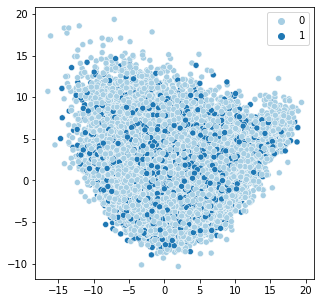

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_texturas)

plt.figure(figsize=(5,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette=sns.color_palette("Paired",n_colors=2))
plt.show()

In [ ]:
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(X_texturas)

plt.figure(figsize=(5,5))
sns.scatterplot(x=X_iso[:,0], y=X_iso[:,1], hue=labels, palette=sns.color_palette("Paired",n_colors=2))
plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X_texturas)

plt.figure(figsize=(5,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette=sns.color_palette("Paired",n_colors=2))
plt.show()